### CMM704 – Coursework
#### Semester 2 - 2025

Name  : Nithin Kolamunna |
IIT ID: 20231720 |
RGU ID: 2330844


In [3]:
# Libraries

import pandas as pd
import seaborn as se
from google.colab import drive
import numpy as np
import matplotlib.pyplot as mat
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean


In [4]:
# Mount the Google Drive and load the data set
drive.mount('/content/drive')
data_2015 =pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DataMining/CourseWork/Dataset_Q2/2015.csv')
data_2019 =pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DataMining/CourseWork/Dataset_Q2/2019.csv')


# check basic information about the data set


# Basic info about dataset
print("\nBasic Information:")
print(data_2015.info)
print(data_2019.info)

# Displaying first few rows
print("\n data_2015 First few Rows:")
print(data_2015.head())
print("\n data_2019 First few Rows:")
print(data_2019.head())


Mounted at /content/drive

Basic Information:
<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.5

# Exploratory Data Analysis (EDA) & Identify Required Features


In [5]:
## Remove Unwanted columns
data_2015 = data_2015.drop(['Happiness Rank','Region','Country','Standard Error','Dystopia Residual'], axis=1)
data_2019 = data_2019.drop(['Overall rank','Country or region'], axis=1)


# replace empty strings
data_2015.replace('', np.nan, inplace=True)
data_2019.replace('', np.nan, inplace=True)

# Check for missing values in both datasets
print("\n Missing Values in 2015 Dataset:")
print(data_2015.isnull().sum().sort_index()) # Null count

print("\n Missing Values in 2019 Dataset:")
print(data_2019.isnull().sum().sort_index()) # Null count


# data set statistics
print("\nSummary Statistics for 2015:")
print(data_2015.describe())

print("\nSummary Statistics for 2019:")
print(data_2019.describe())


 Missing Values in 2015 Dataset:
Economy (GDP per Capita)         0
Family                           0
Freedom                          0
Generosity                       0
Happiness Score                  0
Health (Life Expectancy)         0
Trust (Government Corruption)    0
dtype: int64

 Missing Values in 2019 Dataset:
Freedom to make life choices    0
GDP per capita                  0
Generosity                      0
Healthy life expectancy         0
Perceptions of corruption       0
Score                           0
Social support                  0
dtype: int64

Summary Statistics for 2015:
       Happiness Score  Economy (GDP per Capita)      Family  \
count       158.000000                158.000000  158.000000   
mean          5.375734                  0.846137    0.991046   
std           1.145010                  0.403121    0.272369   
min           2.839000                  0.000000    0.000000   
25%           4.526000                  0.545808    0.856823   
50%      

# Outlier Detection and Removal


 Visualizing Outliers in 2015 Data


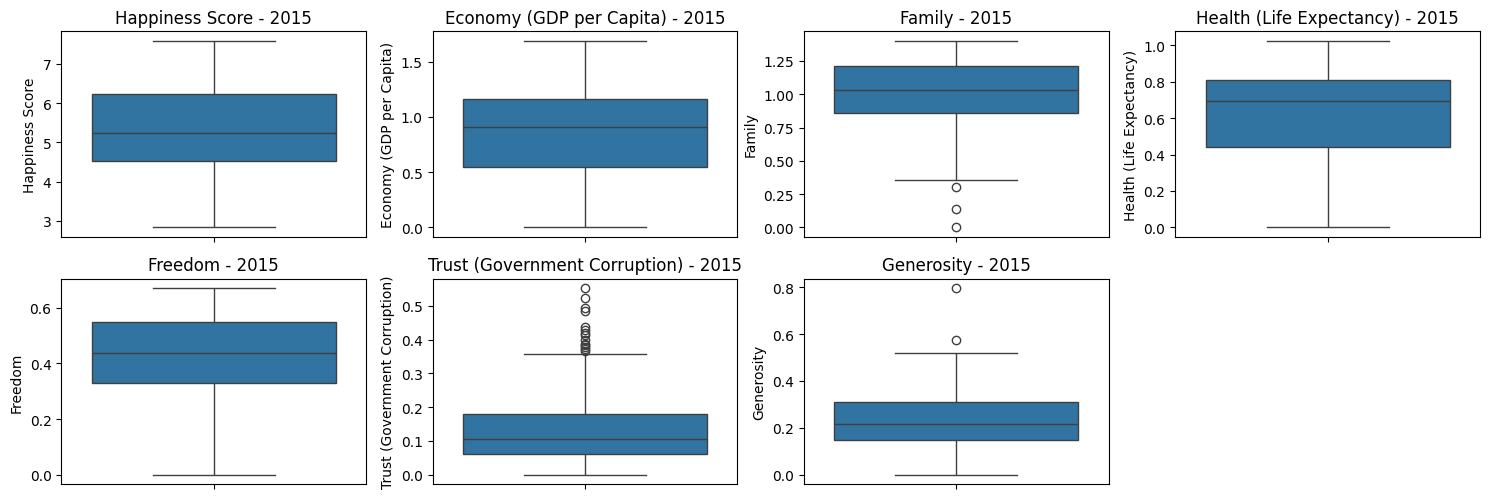


 Visualizing Outliers in 2019 Data


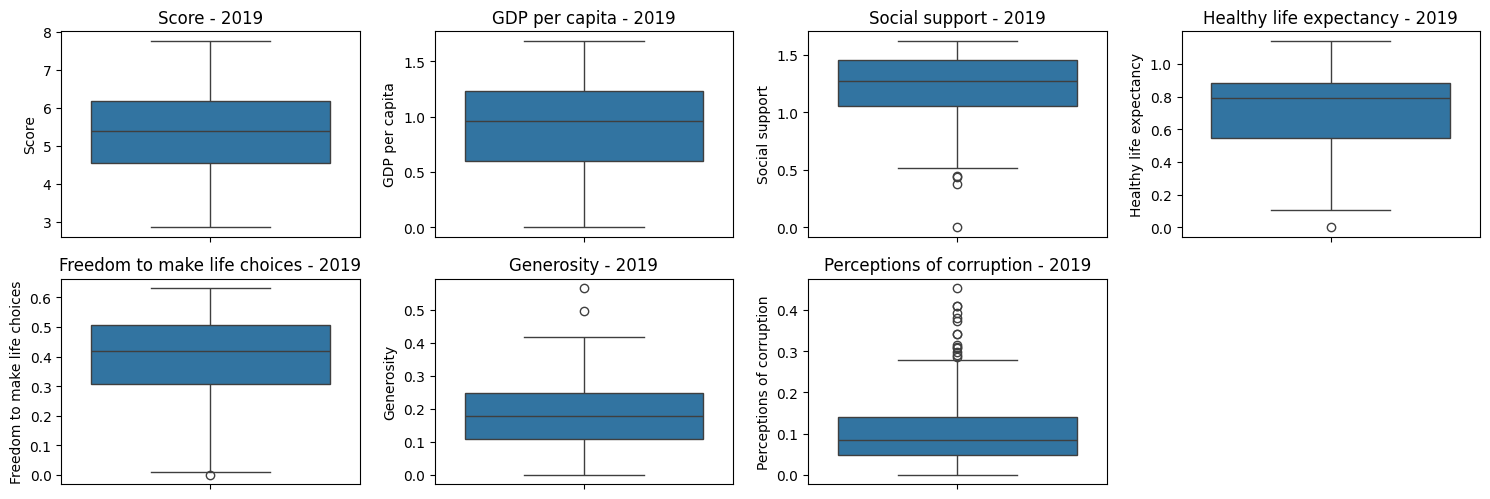

In [6]:
# Visualize Outliers Using Boxplots

# Plot boxplots for numerical columns
def plot_boxplots(_data, title):
    mat.figure(figsize=(15,10))
    for i, column in enumerate(_data.select_dtypes(include=['float64', 'int64']).columns, 1):
        mat.subplot(4, 4, i)
        se.boxplot(data=_data[column])
        mat.title(f'{column} - {title}')
    mat.tight_layout()
    mat.show()


print("\n Visualizing Outliers in 2015 Data")
plot_boxplots(data_2015, "2015")

print("\n Visualizing Outliers in 2019 Data")
plot_boxplots(data_2019, "2019")

2015 Data: (158, 7) → (136, 7) after removing outliers (iqr)
2019 Data: (156, 7) → (133, 7) after removing outliers (iqr)
2015 Data: (158, 7) → (153, 7) after removing outliers (z-score)
2019 Data: (156, 7) → (149, 7) after removing outliers (z-score)

 Data After Outlier Removal (IQR) - 2015


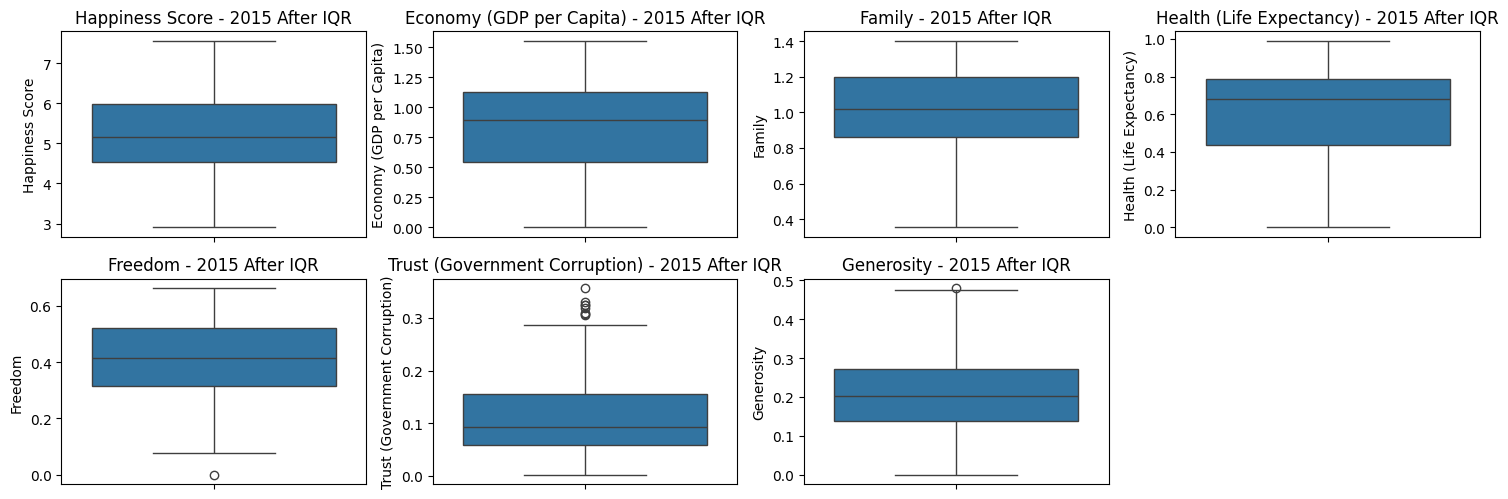


 Data After Outlier Removal (IQR) - 2019


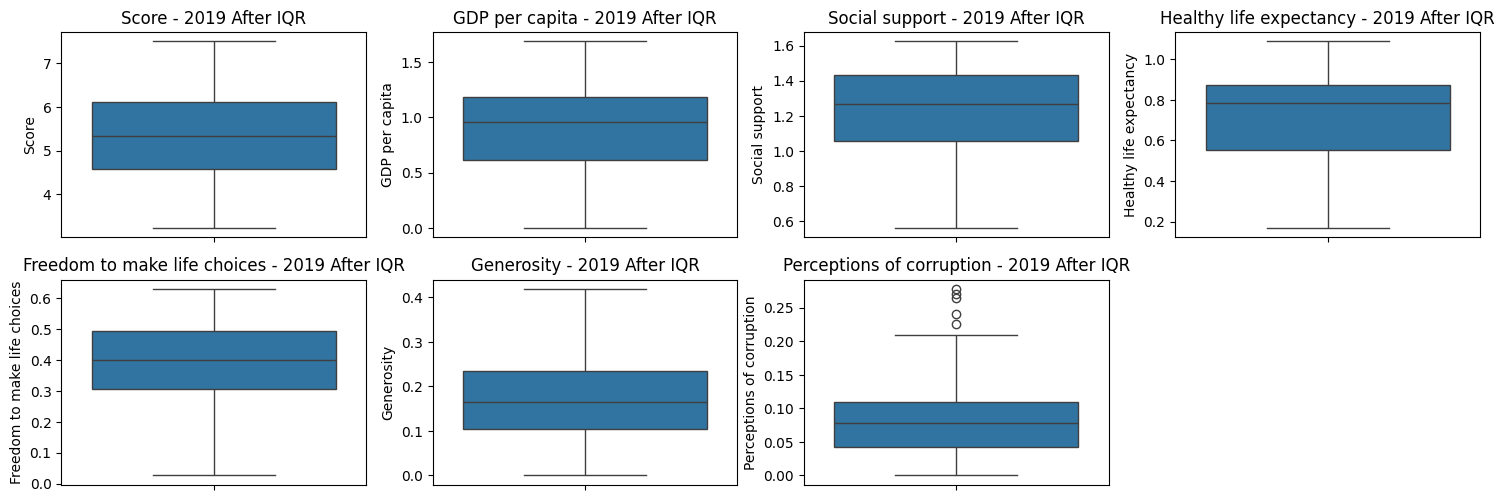




 Data After Outlier Removal (Z-Score) - 2015


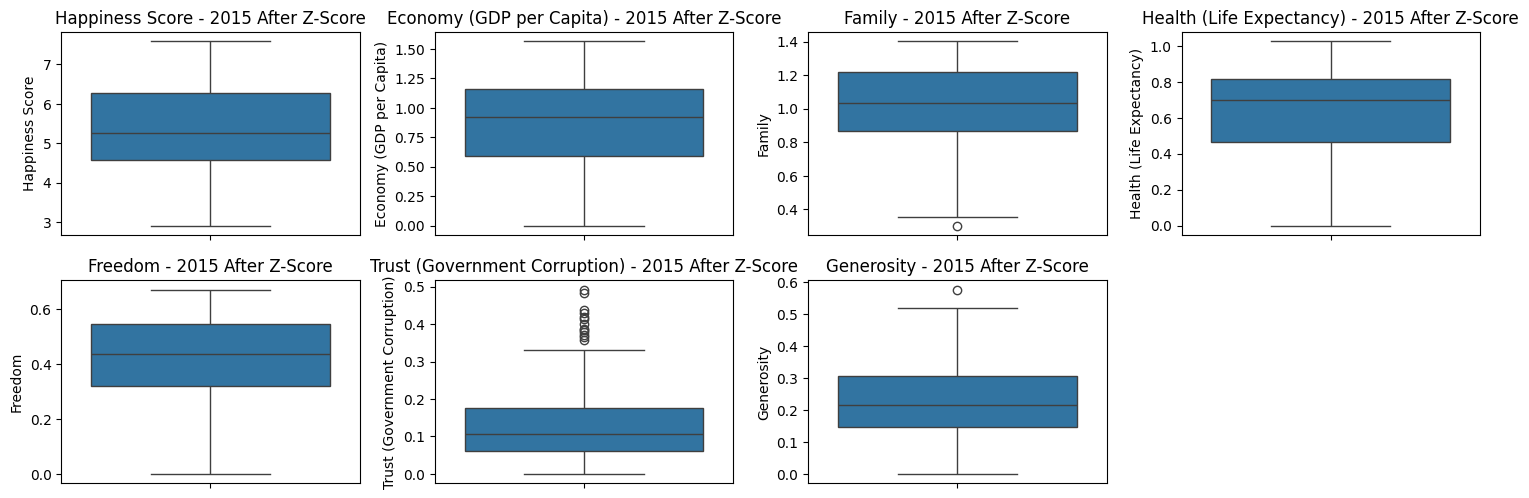


 Data After Outlier Removal (Z-Score) - 2019


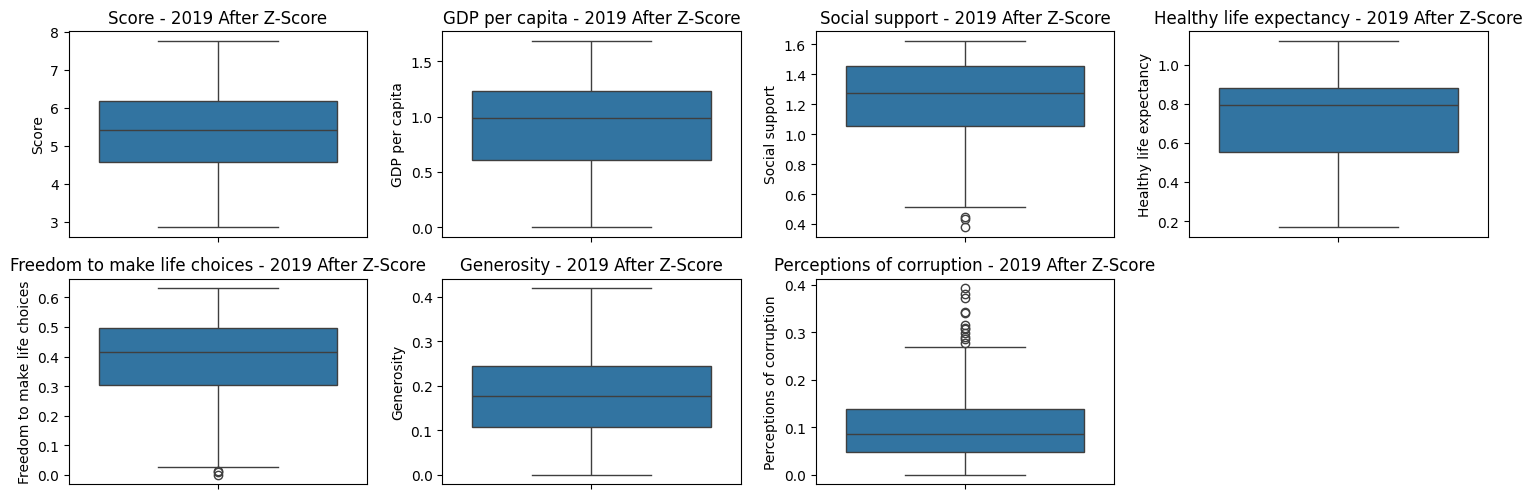

In [7]:
## Detect and Remove Outliers / Unwanted columns


# Function to remove outliers using IQR
def remove_outliers_iqr(_data):
    for column in _data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = _data[column].quantile(0.25)
        Q3 = _data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        _data = _data[(_data[column] >= lower_bound) & (_data[column] <= upper_bound)]
    return _data

# Function to remove outliers using Z-Score Method
def remove_outliers_zscore(_data, threshold=3):
    z_scores = stats.zscore(_data.select_dtypes(include=['float64', 'int64']))
    return _data[(np.abs(z_scores) < threshold).all(axis=1)]




# Apply IQR
data_2015_iqr = remove_outliers_iqr(data_2015.copy())
data_2019_iqr = remove_outliers_iqr(data_2019.copy())

print(f"2015 Data: {data_2015.shape} → {data_2015_iqr.shape} after removing outliers (iqr)")
print(f"2019 Data: {data_2019.shape} → {data_2019_iqr.shape} after removing outliers (iqr)")


# Apply Z-Score
data_2015_z = remove_outliers_zscore(data_2015.copy())
data_2019_z = remove_outliers_zscore(data_2019.copy())

print(f"2015 Data: {data_2015.shape} → {data_2015_z.shape} after removing outliers (z-score)")
print(f"2019 Data: {data_2019.shape} → {data_2019_z.shape} after removing outliers (z-score)")




# Visualizing Cleaned Data
print("\n Data After Outlier Removal (IQR) - 2015")
plot_boxplots(data_2015_iqr, "2015 After IQR")

print("\n Data After Outlier Removal (IQR) - 2019")
plot_boxplots(data_2019_iqr, "2019 After IQR")

print("\n")

print("\n Data After Outlier Removal (Z-Score) - 2015")
plot_boxplots(data_2015_z, "2015 After Z-Score")

print("\n Data After Outlier Removal (Z-Score) - 2019")
plot_boxplots(data_2019_z, "2019 After Z-Score")



### Observations
*   2015 Data: (158, 7)  → (136, 7) after removing outliers (iqr)
*   2019 Data: (156, 7)  → (133, 7) after removing outliers (iqr)
*   2015 Data: (158, 7)  → (153, 7) after removing outliers (z-score)
*   2019 Data: (156, 7)  → (149, 7) after removing outliers (z-score)



Impact:
*   IQR removed significantly more outliers (22 in 2015 and 23 in 2019).
*   Z-score removed fewer outliers (5 in 2015 and 7 in 2019).



Z-Score retains more data compared to IQR.

This data set is limited and losing too many rows is not ideal, So **Z-Score is preferable.**










# Feature Scaling and Transformation.

In [8]:

# Apply Standard Scaling
standardscaler = StandardScaler()

data_2015_scaled = pd.DataFrame(standardscaler.fit_transform(data_2015_z))
data_2019_scaled = pd.DataFrame(standardscaler.fit_transform(data_2019_z))


# print
print("Feature Scaling Completed...")
print("\nFirst few Rows of Scaled Data (2015):")
print(data_2015_scaled.head())

print("\nFirst few Rows of Scaled Data (2019):")
print(data_2019_scaled.head())



Feature Scaling Completed...

First few Rows of Scaled Data (2015):
          0         1         2         3         4         5         6
0  1.949427  1.387893  1.360051  1.250152  1.586655  2.496325  0.527825
1  1.926094  1.145301  1.568649  1.276509  1.342816  0.025284  1.693278
2  1.895580  1.204951  1.403852  0.975522  1.479379  3.062659  0.900466
3  1.891093  1.548840  1.286615  1.018984  1.614219  2.010249  0.947244
4  1.805836  1.207037  1.253616  1.102948  1.370646  1.695432  1.875463

First few Rows of Scaled Data (2019):
          0         1         2         3         4         5         6
0  2.161118  1.102149  1.307140  1.104701  1.451412 -0.302462  3.407374
1  1.962244  1.480436  1.289488  1.287363  1.500530  1.052069  2.792655
2  1.906744  1.204389  1.437764  1.278665  1.416328  2.004833  0.156457
3  1.901194  1.245285  1.077665  1.161239  1.177754  1.637503  2.284330
4  1.893794  1.388420  1.091787  1.391742  1.283007  0.960237  2.816298




* Applied StandardScaler to transform data into a standard scale




# Clustering Model Development (K- Means++)

### Find the Optimal Number of Clusters using the Elbow Method



 Finding Optimal K for 2015 Data...


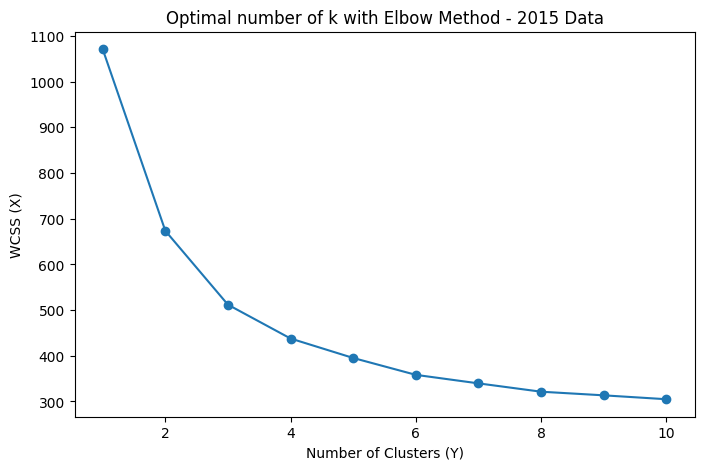


 Finding Optimal K for 2019 Data...


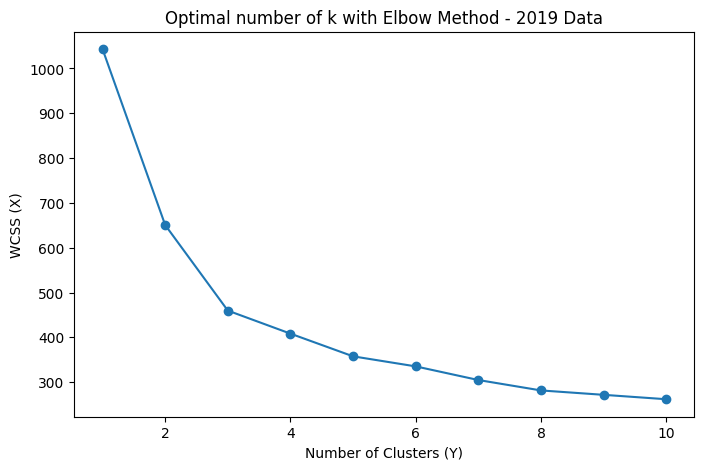

In [9]:
# find the Optimal no of Clusters(k) using the Elbow Method
def plot_elbow_method(data, title):
    sq = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters  = i,
                        init        = 'k-means++',
                        random_state= 123)
        kmeans.fit(data)
        sq.append(kmeans.inertia_)

    # Plot the Curve
    mat.figure(figsize=(8,5))
    mat.plot(range(1, 11), sq, marker='o')
    mat.title(f'Optimal number of k with Elbow Method - {title}')
    mat.xlabel('Number of Clusters (Y)')
    mat.ylabel('WCSS (X)')
    mat.show()

print("\n Finding Optimal K for 2015 Data...")
plot_elbow_method(data_2015_scaled, "2015 Data")

print("\n Finding Optimal K for 2019 Data...")
plot_elbow_method(data_2019_scaled, "2019 Data")



#### Observations

*   From both datasets (2019 and 2015), the "elbow" is clearly observed around
    
*   After k = 2 for 2015 and k = 3 for 2019, there is a significant drop, suggesting that adding more clusters does not significantly improve the clustering.
*   I have decided to select K=2 for 2015 and K=3 for 2019 the future.







### Run K-Means Clustering with Optimal K

In [10]:
# run K-Means++ Clustering with Optimal K
def apply_kmeans(data, k):
    kmeans = KMeans(n_clusters  = k,
                    init        = 'k-means++',
                    random_state= 123)
    lbl = kmeans.fit_predict(data)
    print(f"\n Cluster Centers for K={k}:\n", kmeans.cluster_centers_)
    print(f"Silhouette Score for K={k}: {silhouette_score(data, lbl)}")
    return lbl, kmeans



# K based on the elbow method results
optimal_k_2015 = 2
optimal_k_2019 = 3

print("\n Applying K-Means++ Clustering to 2015 Data...")
lbl_2015, kmeans_2015 = apply_kmeans(data_2015_scaled, optimal_k_2015)

print("\n Applying K-Means++ Clustering to 2019 Data...")
lbl_2019, kmeans_2019 = apply_kmeans(data_2019_scaled, optimal_k_2019)


 Applying K-Means++ Clustering to 2015 Data...

 Cluster Centers for K=2:
 [[-0.70038203 -0.61183276 -0.58807073 -0.56319348 -0.55673919 -0.35597253
  -0.24381719]
 [ 0.89899783  0.78533758  0.75483705  0.72290506  0.71462045  0.45691997
   0.31295937]]
Silhouette Score for K=2: 0.3021465397743113

 Applying K-Means++ Clustering to 2019 Data...

 Cluster Centers for K=3:
 [[-1.00901782 -1.17056662 -1.13903568 -1.18597995 -0.45897221  0.37040735
  -0.09254984]
 [ 1.43480381  1.20161977  0.94733547  1.09110994  1.01051778  1.01476245
   1.70655308]
 [ 0.16651982  0.33561226  0.39485418  0.37890281 -0.03436837 -0.53542877
  -0.46932604]]
Silhouette Score for K=3: 0.3386713402124577


# Cluster Evaluation

In [11]:
# function for evaluating KMeans++ clusters
def evaluate_kmeans(data, year):
    print(f"\nApplying K-Means++ Clustering to {year} Data")

    # applying different K values (2-8)
    for k in range(2,8):
        kmeans = KMeans(n_clusters   = k,
                        init         = 'k-means++',
                        random_state = 123)
        labels = kmeans.fit_predict(data)

        score  = silhouette_score(data, labels)
        print(f"K = {k} : Silhouette Score = {score:.4f}")


# Evaluate 2015 data
evaluate_kmeans(data_2015_scaled, 2015)

# Evaluate 2019 data
evaluate_kmeans(data_2019_scaled, 2019)



Applying K-Means++ Clustering to 2015 Data
K = 2 : Silhouette Score = 0.3021
K = 3 : Silhouette Score = 0.2860
K = 4 : Silhouette Score = 0.2451
K = 5 : Silhouette Score = 0.2329
K = 6 : Silhouette Score = 0.2245
K = 7 : Silhouette Score = 0.2148

Applying K-Means++ Clustering to 2019 Data
K = 2 : Silhouette Score = 0.3206
K = 3 : Silhouette Score = 0.3387
K = 4 : Silhouette Score = 0.2397
K = 5 : Silhouette Score = 0.2363
K = 6 : Silhouette Score = 0.2231
K = 7 : Silhouette Score = 0.2284



The optimal cluster number for the 2015 dataset is k = 2, and the 2019 dataset is K = 3, based on the highest observed Silhouette Scores during evaluation.

The model evaluation results again validate our choice of K, confirming that two clusters provide the data's most meaningful and well-separated grouping.



# Model Drift Analysis

### Centroid Shifts and Cluster Membership Changes over time

In [12]:

# Rename 2019 dataset columns to match 2015 names
column_mapping_2019 = {
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Generosity': 'Generosity',
    'Score': 'Happiness Score'
}

# rename to original column names after scaling
data_2015_scaled.columns = data_2015.columns
data_2019_scaled.columns = data_2019.columns


# apply Rename to 2015
data_2019_scaled_renamed = data_2019_scaled.rename(columns=column_mapping_2019)

# Find common features
_features = list(set(data_2015_scaled.columns) & set(data_2019_scaled_renamed.columns))
data2015_scaled_features = data_2015_scaled[_features]
data2019_scaled_features = data_2019_scaled_renamed[_features]

print(f"Common features: {_features}")
print("Shapes after aligning features:", data2015_scaled_features.shape, data2019_scaled_features.shape)




# K-Means++ clustering function
def apply_kmeans(data, k):
    kmeans = KMeans(n_clusters  = k,
                    init        = 'k-means++',
                    random_state= 123)
    klbl = kmeans.fit_predict(data)
    score = silhouette_score(data, klbl)
    print(f"Silhouette Score for K={k}: {score:.4f}")
    return klbl, kmeans


# Apply K-Means++ (After feature rename)
print("\nApplying K-Means++ Clustering to 2015 Data...")
lbl_2015, kmeans_2015 = apply_kmeans(data2015_scaled_features, 2)

print("\nApplying K-Means++ Clustering to 2019 (2 clusters) Data...")
lbl_2019_2c, kmeans_2019_2c = apply_kmeans(data2019_scaled_features, 2)

print("\nApplying K-Means++ Clustering to 2019 (3 clusters) Data...")
lbl_2019_3c, kmeans_2019_3c = apply_kmeans(data2019_scaled_features, 3)



Common features: ['Freedom', 'Family', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score', 'Economy (GDP per Capita)']
Shapes after aligning features: (153, 7) (149, 7)

Applying K-Means++ Clustering to 2015 Data...
Silhouette Score for K=2: 0.3021

Applying K-Means++ Clustering to 2019 (2 clusters) Data...
Silhouette Score for K=2: 0.3206

Applying K-Means++ Clustering to 2019 (3 clusters) Data...
Silhouette Score for K=3: 0.3387


In [13]:

# Centroid shift
def calculate_centroid_shifts(centroids_2015, centroids_2019):
    return [euclidean(centroids_2015[i], centroids_2019[i]) for i in range(min(len(centroids_2015), len(centroids_2019)))]

# print array
print("\nCentroid Shifts between 2015 and 2019:")
for i, shift in enumerate(calculate_centroid_shifts(kmeans_2015.cluster_centers_, kmeans_2019_2c.cluster_centers_)):
    print(f"Cluster {i}: Shift Distance = {shift:.4f}")



# Cluster changes
min_len = min(len(lbl_2015), len(lbl_2019_2c))

cluster_change = np.sum(lbl_2015[:min_len] != lbl_2019_2c[:min_len])
print("\nCluster changes between 2015 and 2019:")
print(f"\u2B50 \u2B50 {cluster_change} out of {min_len} countries have changed their cluster")



Centroid Shifts between 2015 and 2019:
Cluster 0: Shift Distance = 0.6685
Cluster 1: Shift Distance = 0.6231

Cluster changes between 2015 and 2019:
⭐ ⭐ 30 out of 149 countries have changed their cluster


Old name in 2019   | Corrected name (like 2015)
-------------------|------------------
GDP per capita     | Economy (GDP per Capita)
Social support     | Family
Healthy life expectancy     | Health (Life Expectancy)
Freedom to make life choices     | Freedom
Perceptions of corruption     | Trust (Government Corruption)
Generosity     | Generosity
Score     | Happiness Score

---
**Note :**

When measuring the centroid shift between 2015 and 2019, it is essential to use the same features across both datasets. Otherwise, the comparison would not be valid, and the model would not be properly aligned.

During the common feature selection, I noticed that several important columns were missing due to differences in column naming between the datasets. Therefore, I decided to manually map and rename the columns in the 2019 dataset to match the feature names used in the 2015 dataset.

This manual mapping ensured that a greater number of meaningful features were retained for the centroid shift and model drift analysis, resulting in a more accurate and reliable comparison.

# Visualization of results

### PCA

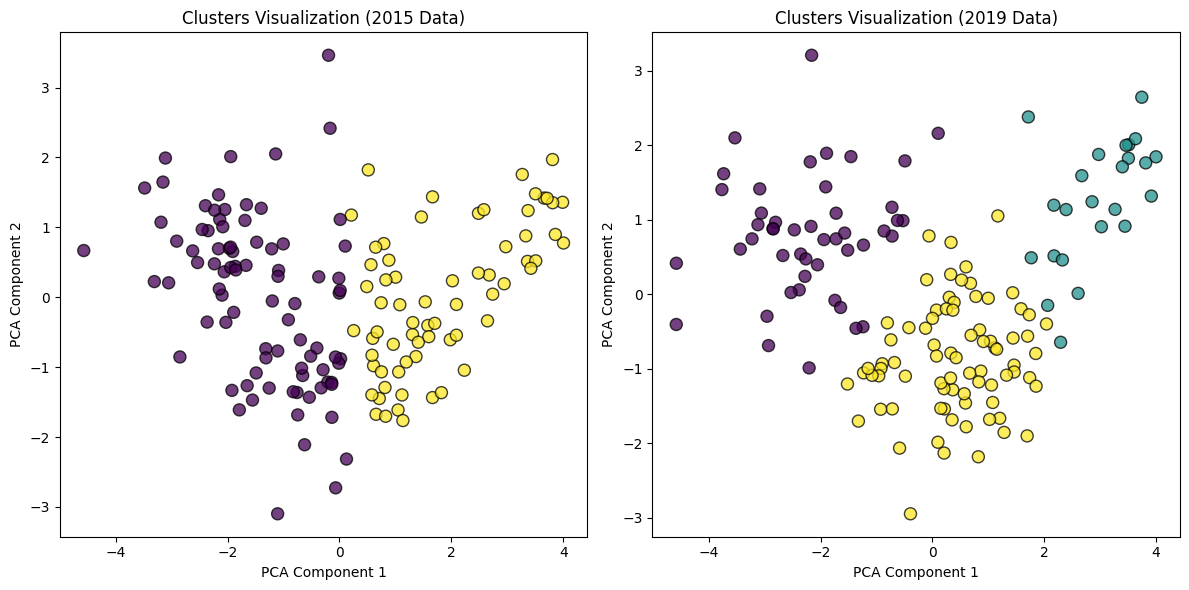

In [14]:

# PCA for 2 components
pca = PCA(n_components=2)

data2015_pca = pca.fit_transform(data2015_scaled_features)
data2019_pca = pca.fit_transform(data2019_scaled_features)

# Visualization
fig, axes = mat.subplots(1, 2, figsize=(12, 6))

# Plot for 2015
axes[0].scatter(data2015_pca[:, 0],
                data2015_pca[:, 1],
                c = lbl_2015,
                cmap  = 'viridis',
                s = 75,
                alpha = 0.75,
                edgecolors  = 'k')
axes[0].set_title('Clusters Visualization (2015 Data)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Plot for 2019
axes[1].scatter(data2019_pca[:, 0],
                data2019_pca[:, 1],
                c = lbl_2019_3c,
                cmap  = 'viridis',
                s = 75,
                alpha = 0.75,
                edgecolors  = 'k')
axes[1].set_title('Clusters Visualization (2019 Data)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

mat.tight_layout()
mat.show()


### Plotting cluster change over time

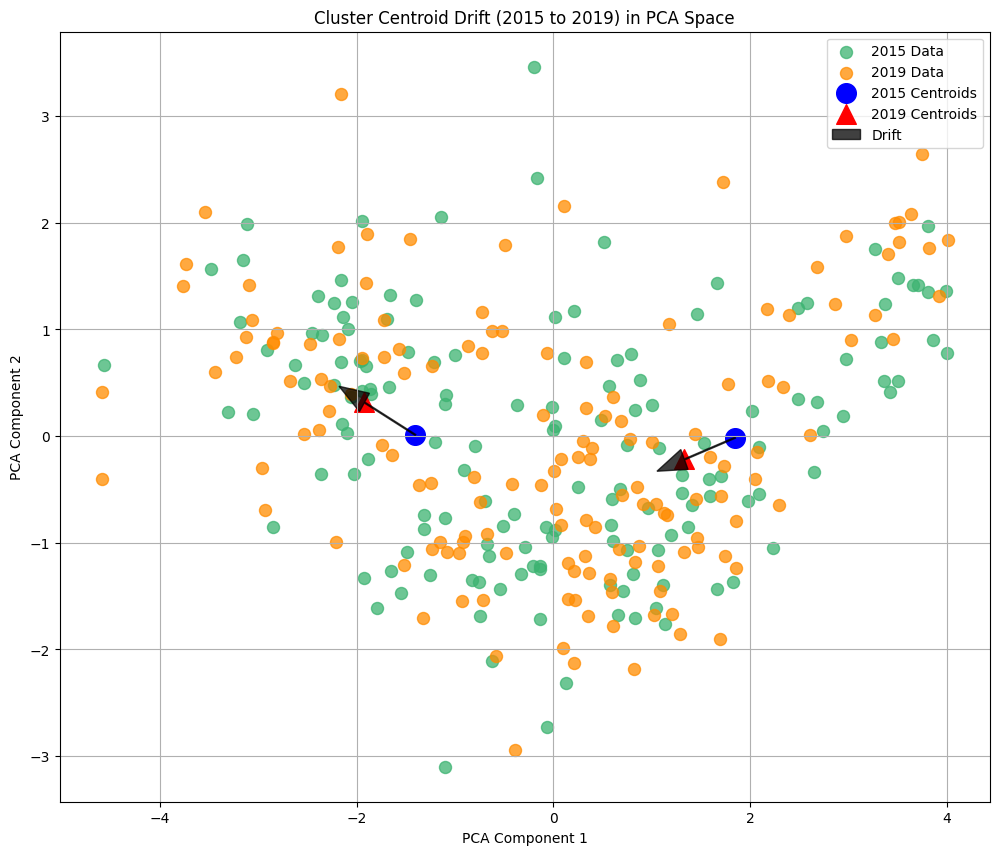

In [15]:

# PCA (using same PCA fit)
pca = PCA(n_components=2)
data_2015_pca = pca.fit_transform(data2015_scaled_features)
data_2019_pca = pca.fit_transform(data2019_scaled_features)



#2015 k-means++, 2 Perform Clustering
kmeans_2015 = KMeans(n_clusters  = 2, ##
                     init        = 'k-means++',
                     random_state= 123)
kmeans_2015.fit(data_2015_pca)
centroids_2015 = kmeans_2015.cluster_centers_

#2019 k-means++, 2 Perform Clustering
kmeans_2019 = KMeans(n_clusters  = 2, ##
                     init        = 'k-means++',
                     random_state= 123)
kmeans_2019.fit(data_2019_pca)
centroids_2019 = kmeans_2019.cluster_centers_



# preparing canvas
mat.figure(figsize=(12, 10))



# Plot data points 2015
mat.scatter(data_2015_pca[:, 0],
            data_2015_pca[:, 1],
            s     = 75,
            alpha = 0.75,
            c     = 'mediumseagreen',
            label = '2015 Data')

# Plot data points 2019
mat.scatter(data_2019_pca[:, 0],
            data_2019_pca[:, 1],
            s     = 75,
            alpha = 0.75,
            c     = 'darkorange',
            label = '2019 Data')



# Plot centroids 2015
mat.scatter(centroids_2015[:, 0],
            centroids_2015[:, 1],
            s       = 200,
            c       = 'blue',
            marker  = 'o',
            label   = '2015 Centroids')

# Plot centroids 2019
mat.scatter(centroids_2019[:, 0],
            centroids_2019[:, 1],
            s       = 200,
            c       = 'red',
            marker  = '^',
            label   = '2019 Centroids')



# Draw drift
n_clusters = min(len(centroids_2015), len(centroids_2019))
for i in range(n_clusters):
    mat.arrow(centroids_2015[i, 0], centroids_2015[i, 1],
              centroids_2019[i, 0] - centroids_2015[i, 0],
              centroids_2019[i, 1] - centroids_2015[i, 1],
              alpha       = 0.75,
              width       = 0.01,
              head_width  = 0.2,
              color       = 'black',
              label       = 'Drift'
              if i == 0 else ""
              )


mat.title('Cluster Centroid Drift (2015 to 2019) in PCA Space')
mat.xlabel('PCA Component 1')
mat.ylabel('PCA Component 2')
mat.legend()
mat.grid(True)
mat.show()


### Observations



*   The arrows between 2015 and 2019 centroids indicate clear shifts in cluster centers over time.
*   The lengths of the arrows (centroid movement) are not equal
*   2015 clusters are a bit more compact (2 clusters).
*   2019 clusters appear more dispersed (3 clusters), indicating more spread or variability in data distribution










# Conclusion and insights



*   In 2015, the data was best grouped into 2 clusters.
    
    In 2019, the optimal number of clusters increased to 3, indicating a more segmented and complex structure.

    This change indicates the rise of a new group of countries with unique attributes related to happiness.



*   The PCA visualizations clearly indicated that the positions of the cluster
    centroids shifted significantly between 2015 and 2019.

    The distances between centroids were uneven, indicating that some clusters experienced a bigger transformation than others.


*   In 2015, the clusters were closely grouped together, indicating that the
    Countries within each cluster shared more similarities.

    In 2019, the clusters were more spread out, indicating greater diversity and variability within country groupings.


*  ** 93 out of 149 countries shifted cluster membership from 2015 to 2019.



## **Socio-Economic Trends**


*   **Economic Development:**

    Countries that are experiencing growth in their GDP or have stronger economies may have moved into higher-scoring clusters.


*   **Healthcare Development and Life Expectancy:**

    Improved public health systems contributed to the rise of clusters with higher levels of happiness.


*   **Freedom and Corruption:**

    Countries that have improved their good governance, transparency, and civil democracy may have moved out of lower-scoring clusters.


### *References*


1.   https://medium.com/data-science/a-practical-guide-on-k-means-clustering-ca3bef3c853d

2.   https://medium.com/@robertb909/k-means-clustering-a64f859a1074

3.   https://medium.com/data-scientists-diary/principal-component-analysis-in-python-f735fefccdec

4.   https://www.tpointtech.com/evaluation-of-clustering-in-data-mining#:~:text=Davies%2DBouldin%20Index%3A%20The%20average,and%20minimum%20inter%2Dcluster%20distances.


5.   https://www.youtube.com/watch?v=q_shb4Lyqg0&ab_channel=JCharisTech
6.   https://stackoverflow.com/questions/68040073/euclidean-distance-between-the-two-points-using-vectorized-approach


